# Early Stopping

- Early Stopping is a regularization technique used during training to stop training when the model stops improving on the validation set.
- If you keep training → model memorizes the training data → overfitting.
- Early stopping halts training at the right point where the model has learned enough patterns but hasn’t started memorizing noise.

### How it Works
- Train the model normally.
- Track validation loss (or validation accuracy) after each epoch.
- If the validation loss stops improving for several epochs → stop training.
- Optionally, restore the best weights (from the epoch with lowest validation loss).

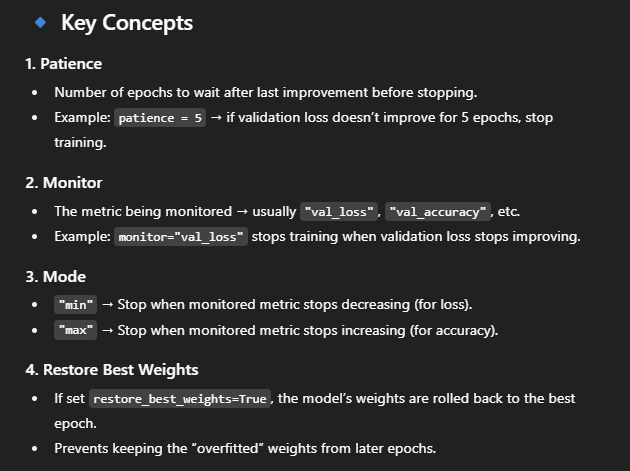

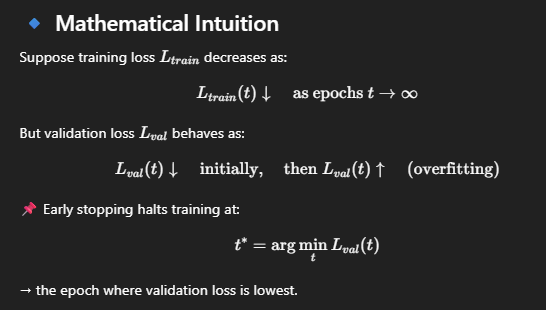

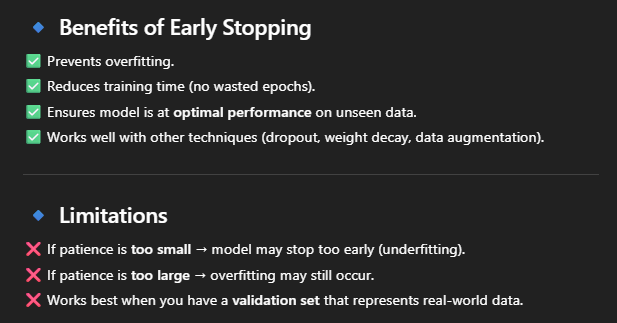

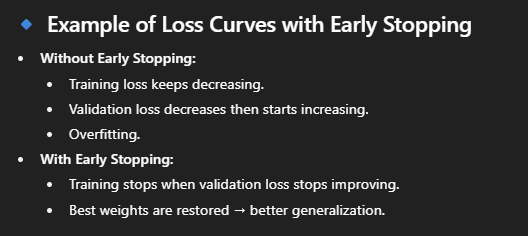

Epoch 1/10
375/375 - 2s - 5ms/step - accuracy: 0.8925 - loss: 0.3779 - val_accuracy: 0.9455 - val_loss: 0.1879
Epoch 2/10
375/375 - 1s - 3ms/step - accuracy: 0.9563 - loss: 0.1528 - val_accuracy: 0.9624 - val_loss: 0.1297
Epoch 3/10
375/375 - 1s - 2ms/step - accuracy: 0.9691 - loss: 0.1056 - val_accuracy: 0.9678 - val_loss: 0.1076
Epoch 4/10
375/375 - 1s - 2ms/step - accuracy: 0.9758 - loss: 0.0812 - val_accuracy: 0.9722 - val_loss: 0.0993
Epoch 5/10
375/375 - 1s - 2ms/step - accuracy: 0.9806 - loss: 0.0639 - val_accuracy: 0.9712 - val_loss: 0.0958
Epoch 6/10
375/375 - 1s - 2ms/step - accuracy: 0.9847 - loss: 0.0513 - val_accuracy: 0.9712 - val_loss: 0.0974
Epoch 7/10
375/375 - 1s - 3ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9735 - val_loss: 0.0915
Epoch 8/10
375/375 - 1s - 3ms/step - accuracy: 0.9903 - loss: 0.0326 - val_accuracy: 0.9734 - val_loss: 0.0982
Epoch 9/10
375/375 - 1s - 3ms/step - accuracy: 0.9919 - loss: 0.0266 - val_accuracy: 0.9744 - val_loss: 0.0908
E

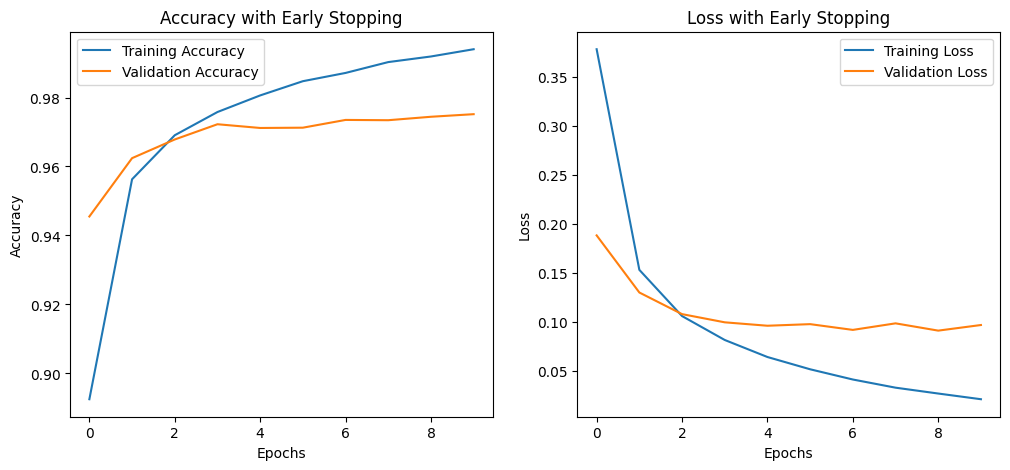

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# -------------------------------
# 1. Load and preprocess MNIST dataset
# -------------------------------
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# -------------------------------
# 2. Define the model
# -------------------------------
model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(784,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

# -------------------------------
# 3. Early stopping callback
# -------------------------------
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",       # what to monitor
    patience=5,               # wait 5 epochs before stopping
    restore_best_weights=True # rollback to best model
)

# -------------------------------
# 4. Train model with validation split
# -------------------------------
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=128,
    callbacks=[early_stop],
    verbose=2
)

# -------------------------------
# 5. Evaluate on test set
# -------------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# -------------------------------
# 6. Plot Training vs Validation Curves
# -------------------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy with Early Stopping")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss with Early Stopping")
plt.legend()

plt.show()
